In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

N = 4

x = np.array([[0,0],
              [1,0],
              [0,1],
              [1,1]])*1.0 # cast to floats
eps_x = 0.1*np.random.randn(100,2)
# eps_x = 0
x = np.vstack([x for _ in range(25)]) + eps_x

eps_y = 0.1*np.random.randn(100)
# eps_y = 0

y = np.array([0,1,1,0])*1.0
y = np.concatenate([y for _ in range(25)]) + eps_y

N = x.shape[0]

Xtilde = np.hstack([x,np.ones(shape=(N,1))]) # Xtilde-ification


In [ ]:
y

array([ 0.035426  ,  0.95611082,  1.01085772, -0.02960091,  0.01141897,
        0.94318162,  1.04864673, -0.01201657,  0.10860437,  0.76755893,
        0.89179614, -0.0775543 , -0.01663178,  1.21176801,  0.95788713,
       -0.03838347,  0.18967844,  0.82777583,  1.01536329, -0.06253873,
        0.08138445,  1.10727109,  0.97849032, -0.05872524, -0.0040484 ,
        1.07163774,  0.89408009, -0.0562946 ,  0.06380881,  1.01571635,
        1.10414898, -0.04980998, -0.09292459,  0.80902867,  0.9483121 ,
        0.20991466, -0.07803342,  0.9223037 ,  0.8775706 ,  0.0360202 ,
        0.05087207,  1.03586148,  0.96260079, -0.00845967, -0.16086959,
        0.9408472 ,  0.89752517, -0.15942506, -0.17306766,  0.97270891,
        1.01800798,  0.15170304,  0.07567015,  1.03933096,  1.00105979,
        0.14512147, -0.01197703,  0.840508  ,  1.0132209 ,  0.00768268,
       -0.05363329,  0.94214689,  1.0719567 , -0.00932634, -0.04553807,
        1.05872952,  1.03797718, -0.03782831,  0.18341097,  1.07

# Pack and unpack

In [ ]:
def pack(w,b):
  theta = np.concatenate([w, np.array([b])])
  return theta

def unpack(theta):
  w = theta[:-1]
  b = theta[-1]
  return w,b


# MSE objective

In [ ]:
def J(theta):
    return np.mean((y - Xtilde@theta)**2)

# Graphing Utilities

In [ ]:
def plot_scatter_data():
    global x, y
    fig = go.Figure(data=[go.Scatter3d(x=x[:, 0], y=x[:, 1], z=y, mode='markers', name='Data Points')])

    fig.update_layout(title='3D Scatter Plot',
                      scene=dict(
                          xaxis_title='Feature 1 (x1)',
                          yaxis_title='Feature 2 (x2)',
                          zaxis_title='Target (y)'))
    return fig

def plot_plane(fig, w, b,alpha=0.5):
    global x

    x_range = np.linspace(x[:, 0].min()-1, x[:, 0].max()+1, 10)
    y_range = np.linspace(x[:, 1].min()-1, x[:, 1].max()+1, 10)
    X_plane, Y_plane = np.meshgrid(x_range, y_range)

    Z_plane = w[0] * X_plane + w[1] * Y_plane + b

    fig.add_trace(go.Surface(x=X_plane, y=Y_plane, z=Z_plane, name='Regression Plane', opacity=alpha))

# An initial guess

In [ ]:
w0 = np.array([0.5,0.5])
b0 = 0.5

In [ ]:
plot_scatter_data()

fig = plot_scatter_data()
plot_plane(fig, w0, b0)
fig.show()

In [ ]:
step_size=0.1

theta0 = pack(w0,b0)


grad_theta = (2/N)*(Xtilde.T @ Xtilde @ theta0 - Xtilde.T @ y)
theta1 = theta0 - step_size*grad_theta


w1,b1 = unpack(theta1)


In [ ]:
plot_scatter_data()

fig = plot_scatter_data()
plot_plane(fig, w1, b1)
fig.show()

In [ ]:
step_size=1/10

theta0 = pack(w0,b0)
theta_list = [theta0]
mse_list = [J(theta0)]
w_list = [w0]
b_list = [b0]

for t in range(1000):
    theta = theta_list[-1]

    grad_theta = (2/N)*(Xtilde.T @ Xtilde @ theta - Xtilde.T @ y)

    theta_next = theta - step_size*grad_theta

    w,b = unpack(theta_next)
    mse = J(theta_next)

    theta_list.append(theta_next)
    w_list.append(w)
    b_list.append(b)
    mse_list.append(mse)


w_final, b_final = unpack(theta_list[-1])
print("Parameters (w) in the last iteration:\n", w_final)
print("\nParameters (b) in the last iteration:\n", b_final)
print("\nMSE in the last iteration:\n", mse_list[-1])

Parameters (w) in the last iteration:
 [-0.02047889 -0.01898458]

Parameters (b) in the last iteration:
 0.5154545592664118

MSE in the last iteration:
 0.2524609435296201


In [ ]:
plot_scatter_data()

fig = plot_scatter_data()
plot_plane(fig, w_final, b_final)
fig.show()

In [ ]:
def polynomial_feature_map_inner(x):
    return [1, x[0],x[1], x[0]**2, x[1]**2, x[0]*x[1]]

def polynomial_feature_map(x_array):
    return np.vstack([polynomial_feature_map_inner(x) for x in x_array])



Xtilde = polynomial_feature_map(x)


def plot_surface(fig, w, alpha=0.5):
    global x

    x_range = np.linspace(x[:, 0].min()-1, x[:, 0].max()+1, 10)
    y_range = np.linspace(x[:, 1].min()-1, x[:, 1].max()+1, 10)
    X_plane, Y_plane = np.meshgrid(x_range, y_range)

    Z_plane = (
        w[0]
        + w[1] * X_plane
        + w[2] * Y_plane
        + w[3] * X_plane**2
        + w[4] * Y_plane**2
        + w[5] * X_plane * Y_plane
    )


    fig.add_trace(go.Surface(x=X_plane, y=Y_plane, z=Z_plane, name='Regression Plane', opacity=alpha))

In [ ]:
fig = plot_scatter_data()
w0 = np.ones(6)
plot_surface(fig, w0)
fig.show()

In [ ]:
def J(w):
    return np.mean((y - Xtilde@w)**2)

def dJdw(w):
  grad_w = (2/N)*((Xtilde.T @ Xtilde @ w) - Xtilde.T @ y)
  return grad_w


In [ ]:
w_list = [w0] # list of the w's

mse_list = [J(w0)]

num_steps = 1000
step_size = 1/10
for t in range(num_steps):
  w = w_list[-1]

  grad_w = dJdw(w)

  w_next = w - step_size * grad_w
  mse_list.append(J(w_next))

  w_list.append(w_next)


w_final = w_list[-1]

fig = plot_scatter_data()
w0 = np.ones(6)
plot_surface(fig, w_final)
fig.show()

In [2]:
import numpy as np

def polynomial_feature_map_(x, degree):
    # Note: x is a number, i.e., an array with shape=()
    
    # COMPLETE THE LINE BELOW
    return np.array([x**i for i in range(degree+1)])

def polynomial_feature_map(x_array, degree):
    # Note: This is not vectorized. That is okay for this problem.
    return np.array([polynomial_feature_map_(x_array[i], degree) for i in range(len(x_array))])


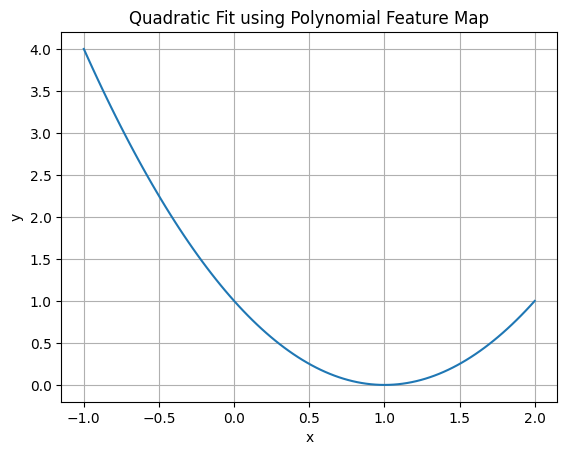

In [5]:
import matplotlib.pyplot as plt

x = np. linspace (-1, 2, 100)
degree = 2
w = np.array ([1 , -2, 1])
X_tilde = polynomial_feature_map(x, degree)
y = X_tilde @ w
plt.plot (x, y)